In [1]:
### import packages
#### load packages, *.h5 folder and exp.h5 file location
%matplotlib widget

from essential_func import *
from analysis_data import *

#### NN packages
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Lambda

In [38]:
### Classification for PDB files
%matplotlib widget
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report

labels = ['Abeta', 'tau']
degs = ['-3', '-2', '-1', '0', '1', '2', '3']
columns=['file', 'label'] + degs + ['directory']
ext = 'csv' 
dirs = ['Abeta','tau']
qvalues = np.array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.  ])
# qvalues = np.array([1.34, 0.1 , 0.37])   ### chose q values to use for classification

### computation
## CSV Files q value must be same for all files
qgrid = np.array([0.00E+00, 1.00E-02, 2.00E-02, 3.00E-02, 4.00E-02, 5.00E-02, 6.00E-02, 7.00E-02, 8.00E-02, 9.00E-02, 1.00E-01, 1.10E-01, 1.20E-01, 1.30E-01, 1.40E-01, 1.50E-01, 1.60E-01, 1.70E-01, 1.80E-01, 1.90E-01, 2.00E-01, 2.10E-01, 2.20E-01, 2.30E-01, 2.40E-01, 2.50E-01, 2.60E-01, 2.70E-01, 2.80E-01, 2.90E-01, 3.00E-01, 3.10E-01, 3.20E-01, 3.30E-01, 3.40E-01, 3.50E-01, 3.60E-01, 3.70E-01, 3.80E-01, 3.90E-01, 4.00E-01, 4.10E-01, 4.20E-01, 4.30E-01, 4.40E-01, 4.50E-01, 4.60E-01, 4.70E-01, 4.80E-01, 4.90E-01, 5.00E-01, 5.10E-01, 5.20E-01, 5.30E-01, 5.40E-01, 5.50E-01, 5.60E-01, 5.70E-01, 5.80E-01, 5.90E-01, 6.00E-01, 6.10E-01, 6.20E-01, 6.30E-01, 6.40E-01, 6.50E-01, 6.60E-01, 6.70E-01, 6.80E-01, 6.90E-01, 7.00E-01, 7.10E-01, 7.20E-01, 7.30E-01, 7.40E-01, 7.50E-01, 7.60E-01, 7.70E-01, 7.80E-01, 7.90E-01, 8.00E-01, 8.10E-01, 8.20E-01, 8.30E-01, 8.40E-01, 8.50E-01, 8.60E-01, 8.70E-01, 8.80E-01, 8.90E-01, 9.00E-01, 9.10E-01, 9.20E-01, 9.30E-01, 9.40E-01, 9.50E-01, 9.60E-01, 9.70E-01, 9.80E-01, 9.90E-01, 1.00E+00, 1.01E+00, 1.02E+00, 1.03E+00, 1.04E+00, 1.05E+00, 1.06E+00, 1.07E+00, 1.08E+00, 1.09E+00, 1.10E+00, 1.11E+00, 1.12E+00, 1.13E+00, 1.14E+00, 1.15E+00, 1.16E+00, 1.17E+00, 1.18E+00, 1.19E+00, 1.20E+00, 1.21E+00, 1.22E+00, 1.23E+00, 1.24E+00, 1.25E+00, 1.26E+00, 1.27E+00, 1.28E+00, 1.29E+00, 1.30E+00, 1.31E+00, 1.32E+00, 1.33E+00, 1.34E+00, 1.35E+00, 1.36E+00, 1.37E+00, 1.38E+00, 1.39E+00, 1.40E+00, 1.41E+00, 1.42E+00, 1.43E+00, 1.44E+00, 1.45E+00, 1.46E+00, 1.47E+00, 1.48E+00, 1.49E+00, 1.50E+00, 1.51E+00, 1.52E+00, 1.53E+00, 1.54E+00, 1.55E+00, 1.56E+00, 1.57E+00, 1.58E+00, 1.59E+00, 1.60E+00, 1.61E+00, 1.62E+00, 1.63E+00, 1.64E+00, 1.65E+00, 1.66E+00, 1.67E+00, 1.68E+00, 1.69E+00, 1.70E+00, 1.71E+00, 1.72E+00, 1.73E+00, 1.74E+00, 1.75E+00, 1.76E+00, 1.77E+00, 1.78E+00, 1.79E+00, 1.80E+00, 1.81E+00, 1.82E+00, 1.83E+00, 1.84E+00, 1.85E+00, 1.86E+00, 1.87E+00, 1.88E+00, 1.89E+00, 1.90E+00, 1.91E+00, 1.92E+00, 1.93E+00, 1.94E+00, 1.95E+00, 1.96E+00, 1.97E+00, 1.98E+00, 1.99E+00, 2.00E+0])
q_len = len(qvalues)
q_indices =  np.unique([qgrid_to_indices(qgrid, qvalue=qvalue) for qvalue in qvalues])

df = pd.DataFrame([], columns=columns)

for label in dirs:
    df_l = pd.DataFrame([], columns=columns)
    directory = f'/Users/bashit.a/Documents/Alzheimer/PDB/CSV/{label}'
    files_sorted = cwd_files_search_with(seek_str=ext, search_where = 'end', directory = directory)
    df_l['file']  = files_sorted
    df_l['label'] = label
    df_l['directory'] = directory

    for file in files_sorted:
        df_t = pd.read_csv(os.path.join(directory,file)) ### file '5O3L.csv'
        for deg in degs:
            df_l.loc[df_l['file'] == file, deg] = label+deg if not df_t[deg].isnull().values.any() else df_l[df_l['file'] == file][deg]

    df = df.append(df_l)
    df.reset_index(drop=True, inplace=True)

display(df)

def X_y(df, labels, degs=degs ):
    y = []
    X = np.zeros((0,q_len))
    pdb   = []
    twist = []

    for label in labels:
        for index in df.index.values:
            for idx, deg_label in enumerate(df.loc[ index ][degs]):  ### loop over all dets
                if str(deg_label).find( label )==0:
                    df_t   = pd.read_csv(os.path.join(df.loc[ index ]['directory'], df.loc[ index ]['file']))
                    X = np.vstack((X,df_t[degs[idx]][q_indices] ))
                    y.append(df[ 'label'][index])
                    pdb.append(df['file'][index].strip('.csv'))
                    twist.append(deg_label)

    y = np.array(y)
    return X, y, pdb, twist

def label_encoder(y):
    le = preprocessing.LabelEncoder()
    le.fit(y)
    le.classes_
    y = le.transform(y)
    #print(y, le.inverse_transform(le.transform(y)))

    return y

,file,label,-3,-2,-1,0,1,2,3,directory
0,2LMO.csv,Abeta,Abeta-3,Abeta-2,Abeta-1,Abeta0,Abeta1,Abeta2,Abeta3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Abeta
1,2LMQ.csv,Abeta,Abeta-3,Abeta-2,Abeta-1,Abeta0,Abeta1,Abeta2,Abeta3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Abeta
2,2M4J.csv,Abeta,Abeta-3,Abeta-2,Abeta-1,Abeta0,Abeta1,Abeta2,Abeta3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Abeta
3,2MVX.csv,Abeta,Abeta-3,Abeta-2,Abeta-1,Abeta0,Abeta1,Abeta2,Abeta3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Abeta
4,2NAO.csv,Abeta,Abeta-3,Abeta-2,Abeta-1,Abeta0,Abeta1,Abeta2,Abeta3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Abeta
5,2mpz.csv,Abeta,Abeta-3,Abeta-2,Abeta-1,Abeta0,Abeta1,Abeta2,Abeta3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Abeta
6,5AEF.csv,Abeta,Abeta-3,Abeta-2,Abeta-1,Abeta0,Abeta1,Abeta2,Abeta3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Abeta
7,5KK3.csv,Abeta,Abeta-3,Abeta-2,Abeta-1,Abeta0,Abeta1,Abeta2,Abeta3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Abeta
8,5OQV.csv,Abeta,Abeta-3,Abeta-2,Abeta-1,Abeta0,Abeta1,Abeta2,Abeta3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Abeta
9,6SHS.csv,Abeta,Abeta-3,Abeta-2,Abeta-1,Abeta0,Abeta1,Abeta2,Abeta3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Abeta


In [32]:
### Split and preprocessing - X_train , X_test , y_train, y_test

X, y, pdb, twist  = X_y(df, labels)

train_df, test_df = train_test_split(df, test_size=0.3, random_state=10)
X_train, y_train_l, pdb_train, twist_train  = X_y(train_df, labels)
X_test,  y_test_l,  pdb_test,  twist_test   = X_y(test_df, labels)

le = preprocessing.LabelEncoder()
le.fit(y_train_l)
print(le.classes_, '-->', le.transform(le.classes_), '-->', le.inverse_transform(le.transform(le.classes_)))

y_train = label_encoder(y_train_l)
y_test  = label_encoder(y_test_l )

# min_max_scaler = preprocessing.MinMaxScaler()
# X_train = min_max_scaler.fit_transform(X_train)
# X_test  = min_max_scaler.transform(X_test)

print(f'training data = {len(y_train)} \ntesting data = {len(y_test)}')
print(X_train.shape)

['Abeta' 'tau'] --> [0 1] --> ['Abeta' 'tau']
training data = 154 
testing data = 70
(154, 201)


In [34]:
#### Visualize dataset
%matplotlib widget
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA

data_input_w    = ipywidgets.RadioButtons(options=['all', 'trained', 'testing'],value='all')
preprocessing_w = ipywidgets.RadioButtons(options=['no_scaling', 'min_max', 'standard_scalar'],value='no_scaling')
plot_type_w     = ipywidgets.RadioButtons(options=['RAW-DATA', 'PCA'],value='RAW-DATA')

dimension_w     = ipywidgets.RadioButtons(options=['2D', '3D'],value='3D')
dim_1_w         = ipywidgets.SelectionSlider(options = qgrid, value = 0.6, orientation='vertical' , description='x-qgrid', continuous_update=False, style = {'description_width': 'initial'})
dim_2_w         = ipywidgets.SelectionSlider(options = qgrid, value = 1.2, orientation='vertical' , description='y-qgrid', continuous_update=False, style = {'description_width': 'initial'})
dim_3_w         = ipywidgets.SelectionSlider(options = qgrid, value = 1.34, orientation='vertical' , description='z-qgrid', continuous_update=False, style = {'description_width': 'initial'})

classifier_w    = ipywidgets.RadioButtons(options=['SVM', 'KMeans', 'Meanshift'],value='SVM')


min_max_scaler = preprocessing.MinMaxScaler()
scaler         = preprocessing.StandardScaler()

def plot_data_func(data_input_w, preprocessing_w, plot_type_w, dimension_w, dim_1_w ,dim_2_w ,dim_3_w ):
    
    q_indices =  np.array([qgrid_to_indices(qgrid, qvalue=qvalue) for qvalue in [dim_1_w ,dim_2_w ,dim_3_w]])

    print('{}'.format(qgrid[q_indices]))
    
    pca = PCA(n_components= 3 if dimension_w=='3D' else 2)

    
#     x1,y1,z1 = zip(*X[np.where(y==1)][:,q_indices])
#     x2,y2,z2 = zip(*X[np.where(y==0)][:,q_indices])


#     fig, ax = plt.subplots(figsize=(12,10))   
    
#     ax  = fig.add_subplot(111, projection='3d')
#     ax.clear()

#     ax.scatter(x1,y1,z1, c='r', cmap=plt.cm.coolwarm, s=60, marker='o', label='tau')
#     ax.scatter(x2,y2,z2, c='b', cmap=plt.cm.coolwarm, s=60,  marker='x', label='abeta')

#     ax.set(xlabel=f'X-->{qgrid[q_indices[0]]}', ylabel=f'Y-->{qgrid[q_indices[1]]}', zlabel=f'Z-->{qgrid[q_indices[2]]}')
#     ax.view_init(-30, -120)
#     ax.legend()
    if data_input_w == 'all':
        
        if preprocessing_w == 'min_max':
            x1,y1,z1  = zip(*min_max_scaler.fit_transform(X[:,q_indices]))  
        elif preprocessing_w == 'standard_scalar':    
            x1,y1,z1  = zip(*scaler.fit_transform(X[:,q_indices]))  
        else:
            x1,y1,z1 = zip(*X[:,q_indices])
        
        if plot_type_w =='PCA': 
            x1,y1,z1 = zip(*pca.fit(X).transform(X))
        
        twist1   = twist
        pdb1     = pdb
        label1   = y

    elif data_input_w == 'trained':
        
        if preprocessing_w == 'min_max':
            x1,y1,z1  = zip(*min_max_scaler.fit_transform(X_train[:,q_indices]))  
        elif preprocessing_w == 'standard_scalar':    
            x1,y1,z1  = zip(*scaler.fit_transform(X_train[:,q_indices]))  
        else:
            x1,y1,z1 = zip(*X_train[:,q_indices])
        
        twist1   = twist_train
        pdb1     = pdb_train
        label1   = y_train_l


    elif data_input_w == 'testing':
        if preprocessing_w == 'min_max':
            x1,y1,z1  = zip(*min_max_scaler.fit_transform(X_test[:,q_indices]))  
        elif preprocessing_w == 'standard_scalar':    
            x1,y1,z1  = zip(*scaler.fit_transform(X_test[:,q_indices]))  
        else:
            x1,y1,z1 = zip(*X_test[:,q_indices])
        
        twist1   = twist_test
        pdb1     = pdb_test
        label1   = y_test_l


#     fig = px.scatter_3d(x=x1, y=y1, z=z1,
#                   color=y, symbol=pdb, hover_name=twist, template="plotly_white")
    
    fig = px.line_3d(x=x1, y=y1, z=z1, 
                        color=label1, symbol=pdb1, hover_name=twist1, template="plotly_white")
    fig.update_layout(
        autosize=True,
        width=1400,
        height=800,)
    fig.show()

    df_pairwise = pd.DataFrame([x1, y1, z1]).T # le.inverse_transform(y_train)]
    df_pairwise = df_pairwise.assign(label=label1)
    sns.pairplot(df_pairwise, hue="label",palette="bright")

plot_data = ipywidgets.interactive_output(plot_data_func, { 'data_input_w' : data_input_w    ,\
                                                            'preprocessing_w' : preprocessing_w ,\
                                                            'plot_type_w': plot_type_w,\
                                                            'dimension_w' : dimension_w     ,\
                                                            'dim_1_w' : dim_1_w         ,\
                                                            'dim_2_w' : dim_2_w         ,\
                                                            'dim_3_w' : dim_3_w     })

accordion_data            = ipywidgets.Accordion(children = [ipywidgets.VBox([ipywidgets.HBox([data_input_w, preprocessing_w, plot_type_w, dimension_w, dim_1_w, dim_2_w, dim_3_w, ]), plot_data])], titles   = ['Data'] )
accordion_classifier      = ipywidgets.Accordion(children = [classifier_w], titles   = ['Classifier'] )

tab = ipywidgets.Tab()
tab.children = [accordion_data, accordion_classifier]
tab.titles = ['1','4','3']

display(tab)

In [4]:
### DataLoader for NN
BATCH_SIZE = 200

#### Pytorch dataset creation
class X_Y_Dataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    def __len__(self):
        return len(self.X)

train_dataset = X_Y_Dataset(X_train, y_train)
test_dataset  = X_Y_Dataset(X_test,  y_test)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_dataloader  = DataLoader(test_dataset,   batch_size=BATCH_SIZE)

In [5]:
### pytorch Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(201, 512),
            nn.PReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

learning_rate = 1e-3
batch_size = 128
epochs = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X.float())
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.float())
            print(pred.argmax(1),y)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1665598.000000  [    0/  154]
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Test Error: 
 Accuracy: 70.0%, Avg loss: 19044005835799091837140992.000000 

Epoch 2
-------------------------------
loss: 65862130525250085550292992.000000  [    0/  154]
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [15]:
### DecisionTreeClassifier
%matplotlib widget

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

tree.plot_tree(clf)
plt.show()

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 14] <= 5595000.0 else to node 2.
	node=1 is a split node: go to node 3 if X[:, 71] <= 172500.0 else to node 4.
	node=2 is a leaf node.
		node=3 is a leaf node.
		node=4 is a leaf node.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [7]:
### Decision Tree classifier with tree and tuning capability
%matplotlib widget

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
output = ipywidgets.Output()
output_results = ipywidgets.Output()

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.figsize'] = [6, 4]

### parameters
plt.figure()

### computation
class Classifier(object):
    def __init__(self, qgrid, X_train, y_train, X_test, y_test, labels):
        self.qgrid                         = qgrid
        self.X_train = self.X_train_scaled = X_train
        self.y_train                       = y_train
        self.X_test  = self.X_test_scaled  = X_test
        self.y_test                        = y_test
        self.labels                        = labels
        #### qgrid widgets
        self.qgrid_w      = ipywidgets.SelectionRangeSlider(index = (10, len(qgrid)-1), options=qgrid, description='q_range', continuous_update=False)
        self.qgrid_w.observe(self.update_input_widgets, names='value')
        
        #### classifier widgets
        self.classifier_w = ipywidgets.Dropdown(value='SVM', options = ["SVM", "DecisionTree"], description='classifier',    continuous_update=False)
        self.classifier_w.observe(self.update_input_widgets, names='value')
        
        #### normalization widgets
        self.normalize_w = ipywidgets.Dropdown(value='None', options = ["None","StandardScaler", "MinMax", "MaxAbsScaler"], description='Normalizer',    continuous_update=False)
        self.normalize_w.observe(self.update_input_widgets, names='value')        
        
        out = ipywidgets.interactive_output(self.display_widgets,{'a':self.classifier_w} )
#         display(ipywidgets.Label(value='----- Classification -----'), out)
        self.display_widgets(a = self.classifier_w)
        display(output)
        display(output_results)
        
        #### load classifier widgets
        self.classifier_widgets()
        
    def classifier_widgets(self):
        #### Decusion Tree parameter
        self.criterion_w = ipywidgets.Dropdown(value = "gini", options=["gini", "entropy", "log_loss"], description='criterion', )


    @output.capture(clear_output=True)
    def display_widgets(self, a):
        display(ipywidgets.VBox([self.qgrid_w, self.normalize_w, self.classifier_w]))
        
        if self.classifier_w.value == "DecisionTree": 
            display(ipywidgets.HBox([self.criterion_w]))
        self.execute_w = ipywidgets.Button(description='RUN Classifier')
        self.execute_w.on_click(self.on_button_clicked)
        display(self.execute_w)
        
    def update_input_widgets(self, *args):
        
        
        #### None case
        self.X_train_scaled = self.X_train[:,self.qgrid_w.index[0]:self.qgrid_w.index[1]]
        self.X_test_scaled  = self.X_test[:,self.qgrid_w.index[0]:self.qgrid_w.index[1]]
        
        if self.normalize_w.value   != "None":
            if self.normalize_w.value   == "StandardScaler": scaler=StandardScaler()
            elif self.normalize_w.value == "MinMax":         scaler=MinMaxScaler()
            elif self.normalize_w.value == "MaxAbsScaler":   scaler=MaxAbsScaler()

            self.X_train_scaled = scaler.fit_transform(self.X_train_scaled)
            self.X_test_scaled  = scaler.transform(self.X_test_scaled)

#         if self.classifier_w.value == "DecisionTree": 
#             self.DecisionTree_clf()
            
        print(self.qgrid_w.value, self.classifier_w.value, self.normalize_w.value, self.X_train_scaled.shape)
    
    @output_results.capture(clear_output=False)
    def performace_matrices(self, true, pred, labels, **kwargs):

        df_class = pd.DataFrame({'true': true, 'pred':pred}, columns=['true','pred'])
        try:
            print(kwargs['dataset'])
        except:
            pass
        print('confustion matrix ...', '\n',pd.crosstab(df_class['true'], df_class['pred'], rownames=['Actual'], colnames=['Predicted']))
        print(classification_report(df_class['true'], df_class['pred'], target_names=labels))

    @output.capture(clear_output=False)
    def DecisionTree_output(self, a):
        clf = DecisionTreeClassifier(criterion=self.criterion_w.value).fit(self.X_train_scaled, self.y_train)
        output_results.clear_output()
        
        y_test_pred=clf.predict(self.X_test_scaled)
        self.performace_matrices(self.y_test, y_test_pred, self.labels, dataset="-------- Testing --------")
        
        y_train_pred=clf.predict(self.X_train_scaled)
        self.performace_matrices(self.y_train, y_train_pred, self.labels, dataset="-------- Training --------")

        plt.cla()
        plot_tree(clf, filled=True, fontsize=None)
#         plt.title("Decision tree trained on all the PDB dataset")
        plt.tight_layout()
        plt.show()
    
    def on_button_clicked(self, *args):        
        out = ipywidgets.interactive_output(self.DecisionTree_output, {'a':self.classifier_w} )

d = Classifier(qgrid, X_train, y_train, X_test, y_test, labels)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Output()

Output()

In [9]:
### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


num_features = X.shape[1]

#### print function
def print_best_worst (scores):
    scores = sorted(scores, reverse = True)
    
    print("The 5 best features selected by this method are :")
    for i in range(5):
        print(scores[i][1])
    
    print ("The 5 worst features selected by this method are :")
    for i in range(5):
        print(scores[len(scores)-1-i][1])

#### Mean Decrease Impurity
clf = RandomForestClassifier()
clf.fit(X,label_encoder(y))
scores = []
for i in range(num_features):
    scores.append((clf.feature_importances_[i],qgrid[i]))

print_best_worst(scores)
results = dict()
_,results['RF-mean-impunity'] =zip (*scores)

#### Mean Decrease Accuracy

scores = []
clf = RandomForestClassifier()
score_normal = np.mean(cross_val_score(clf, X, y, cv = 2))

# X_shuffled = X.copy()
# np.random.shuffle(X_shuffled[X.columns[i]])

# X_shuffled.meanfreq
for i in range(num_features):
    X_shuffled = X.copy()
    scores_shuffle = []
    for j in range(3):
        np.random.seed(j*3)
        np.random.shuffle(X_shuffled[i])
        score = np.mean(cross_val_score(clf, X_shuffled, label_encoder(y), cv = 2))
        scores_shuffle.append(score)
        
    scores.append((score_normal - np.mean(scores_shuffle), qgrid[i]))

scores,score_normal
print_best_worst(scores)
_,results['RF-mean-accuricy'] =zip (*scores)

The 5 best features selected by this method are :
0.01
0.0
0.02
0.71
0.96
The 5 worst features selected by this method are :
0.08
0.16
0.33
0.36
0.38
The 5 best features selected by this method are :
1.79
1.81
1.78
1.76
1.89
The 5 worst features selected by this method are :
0.58
0.6
0.2
0.59
0.62


In [10]:
### DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt


labels_true = y_train
db = DBSCAN(eps=0.1, min_samples=4).fit(X_train[:,[30,60, 150]])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)

fig = plt.figure()
ax  = fig.add_subplot(projection='3d')


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_train[class_member_mask & core_samples_mask]
    ax.scatter(
        xy[:, 30],
        xy[:, 60],
        xy[:, 150],
        color=tuple(col),
        s=14,
    )

    xy = X_train[class_member_mask & ~core_samples_mask]
    ax.scatter(
        xy[:, 30],
        xy[:, 60],
        xy[:, 150],
        color=tuple(col),
        s=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

Estimated number of clusters: 0
Estimated number of noise points: 154
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [18]:
### SVM - contour plot boundary -- fails to load 
%matplotlib widget

def make_meshgrid(x, y, h=10000):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

#### ref - https://www.geeksforgeeks.org/find-location-of-an-element-in-pandas-dataframe-in-python/
def getIndexes(dfObj, value):
    listOfPos = []   # Empty list
    result = dfObj.isin([value])  # isin() method will return a dataframe with boolean values, True at the positions where element exists
    seriesObj = result.any()      # any() method will return a boolean series
    columnNames = list(seriesObj[seriesObj == True].index)      # Get list of column names where element exists
    for col in columnNames:   # Iterate over the list of columns and extract the row index where element exists
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))  # This list contains a list tuples with the index of element in the dataframe
    return listOfPos

model = svm.SVC()
clf = model.fit(X, y)

# title for the plots
fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [36]:
### Simple SVM Classifier
clf = svm.SVC()  # kernel ='poly', degree = 10   # kernel='linear'
clf.fit(X_train, y_train)
y_test_pred=clf.predict(X_test)

df_class = pd.DataFrame({'test-true':y_test, 'test-pred':y_test_pred},columns=['test-true','test-pred'])
print('confustion matrix ...', '\n',pd.crosstab(df_class['test-true'], df_class['test-pred'], rownames=['Actual'], colnames=['Predicted']))
print(classification_report(df_class['test-true'], df_class['test-pred'], target_names=labels))

confustion matrix ... 
 Predicted   0  1
Actual          
0          42  7
1          14  7
              precision    recall  f1-score   support

       Abeta       0.75      0.86      0.80        49
         tau       0.50      0.33      0.40        21

    accuracy                           0.70        70
   macro avg       0.62      0.60      0.60        70
weighted avg       0.68      0.70      0.68        70



In [11]:
### correlation plots
%matplotlib widget
from scipy.spatial.distance import euclidean
import numpy as np
import seaborn as sns

input_ = X_train[:,30:]
ticks_ = y_train_l #pdb_train #pdb_train

R = np.zeros((len(input_), len(input_)))

for row_ in range(len(input_)):
    for col_ in range(len(input_)):
        R[row_,col_] = euclidean(input_[row_],input_[col_])

fig, ax = plt.subplots(figsize=(12, 12))

sns.set(font_scale=0.5)
sns.heatmap(R, xticklabels=ticks_, yticklabels=ticks_, )  #vmin=0, vmax=1

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [14]:
### Visualize PDB file
%matplotlib widget
from Bio.PDB import *
import nglview as nv

pdb_parser = PDBParser()
structure = pdb_parser.get_structure(_,"/Users/bashit.a/Documents/Alzheimer/PDB/Deepti Murthy/Abeta/5OQV/5OQV.pdb")
view = nv.show_biopython(structure)
view

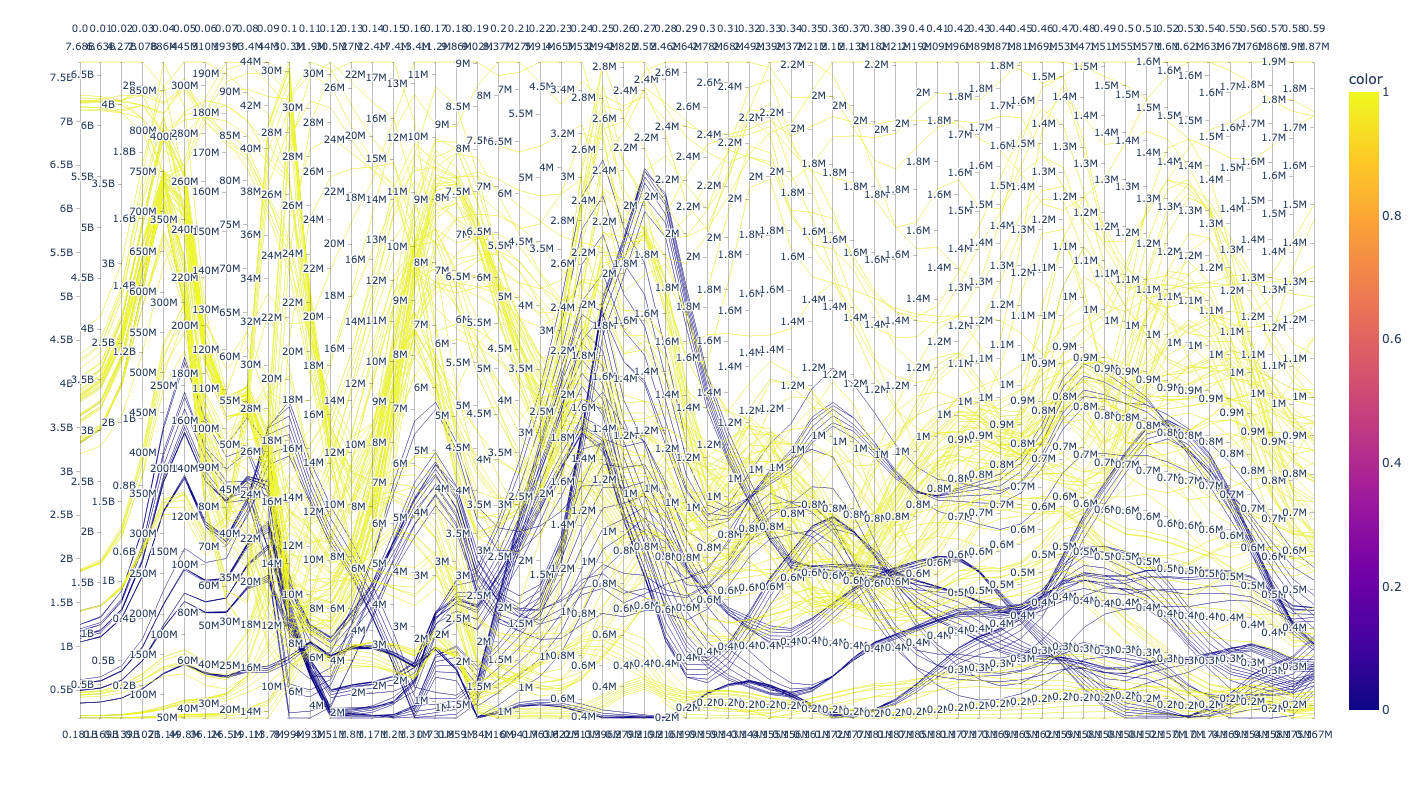

In [17]:
#### Visualize 3d plots for all PDB Structures -- no idea what parallel_coordinates does to the data
%matplotlib widget
import plotly.express as px
df = pd.DataFrame(X_train)

fig = px.parallel_coordinates(df,  color=y_train,  labels=qgrid)  # text=twist, color_continuous_scale=px.colors.diverging.Tealrose,
fig.update_layout(
    autosize=True,
    width=1400,
    height=800,)
fig.show()

In [13]:
### 2D and 3D visualization
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(18,10))

def update_plot(label_fun):
    global ax
    if len(qvalues) == 2:
        ax.clear()
        plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.3)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k',label=f'train-{len(X)}points')
        ax.set_ylabel('y label here')
        ax.set_xlabel('x label here')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
        ax.legend()

        if not any(list(map(lambda x : x=='nan', label_fun))):
            for label_t in label_fun:
                listOfPositions = getIndexes(df, label_t) #  [(0, '-2'), (1, '-2'), (2, '-2'), (3, '-2'), (5, '-2'), (6, '-2'), (7, '-2'), (8, '-2')] print(listOfPositions)  # Printing the position
                X_t = np.zeros((0,q_len))
                for index,col in listOfPositions:
                    df_t   = pd.read_csv(os.path.join(df.loc[ index ]['directory'], df.loc[ index ]['file']))
                    X_t      = np.vstack((X_t,df_t[col][q_indices] ))

                ax.scatter(X_t[:,0], X_t[:,1],marker='D', label=f'{label_t}')
            ax.legend(fontsize=8)

    elif len(qvalues) == 3:
        z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]  # Solve for w3 (z) The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.

        tmp = np.linspace(np.min(X),np.max(X),10)
        x0,x1 = np.meshgrid(tmp,tmp)

        ax  = fig.add_subplot(111, projection='3d')
        ax.clear()

        ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.coolwarm, s=60, edgecolors='k')
#         ax.plot_surface(x0, x1, z(x0,x1), alpha=0.2)
#         ax.view_init(21, 118)
        ax.view_init(-60, 90)

        if not any(list(map(lambda x : x=='nan', label_fun))):
            for label_t in label_fun:
                listOfPositions = getIndexes(df, label_t) #  [(0, '-2'), (1, '-2'), (2, '-2'), (3, '-2'), (5, '-2'), (6, '-2'), (7, '-2'), (8, '-2')] print(listOfPositions)  # Printing the position
                X_t = np.zeros((0,q_len))
                for index,col in listOfPositions:
                    df_t   = pd.read_csv(os.path.join(df.loc[ index ]['directory'], df.loc[ index ]['file']))
                    X_t    = np.vstack((X_t,df_t[col][q_indices] ))

                ax.scatter(X_t[:,0], X_t[:,1], X_t[:,2], marker='D', s=120, label=f'{label_t}')
#                 ax.plot3D(X_t[:,0], X_t[:,1], X_t[:,2],'sr')
            ax.legend(fontsize=8)

# plt.tight_layout()
labels_all = []
for deg in degs:
    labels_all.extend(df[deg].unique())
labels_all = np.array(np.unique(labels_all))
labels_all = labels_all[np.unique(labels_all) != 'nan']
labels_all = np.append(labels_all,'nan')

label_w = ipywidgets.SelectMultiple(options=labels_all, value=[labels_all[0]], description='categories') #rows=10,,disabled=False
ipywidgets.interactive(update_plot, label_fun=label_w)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/Users/bashit.a/miniforge3/envs/py38/lib/python3.8/site-packages/traitlets/traitlets.py:586: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



interactive(children=(SelectMultiple(description='categories', index=(0,), options=('Abeta-1', 'Abeta-2', 'Abe…

In [ ]:
### plotly dash interface
import plotly.graph_objects as go # or plotly.express as px
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

import dash
from dash import html, dcc

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

In [39]:
### visualization with colors
%matplotlib widget
import plotly.express as px
import plotly.graph_objects as go

protein_types = ['Abeta','tau']
color_map = {
    'Abeta-3' : 'blue',
    'Abeta-2' : 'orange',
    'Abeta-1' : 'green',
    'Abeta0'  : 'red',
    'Abeta1'  : 'purple',
    'Abeta2'  : 'brown',
    'Abeta3'  : 'pink',
    'tau-3'   : 'gray',
    'tau-2'   : 'olive',
    'tau-1'   : 'cyan',
    'tau0'    : 'black',
    'tau1'    : 'navy',
    'tau2'    : 'firebrick',
    'tau3'    : 'cyan'
    }

protein_types_w = ipywidgets.SelectMultiple(options=protein_types, value=protein_types)
degs_w          = ipywidgets.SelectMultiple(options=degs         , value=degs)
# pdb_w           = ipywidgets.SelectMultiple(options=df['file'].values  , value=list(df['file'][0]) )
color_w          = ipywidgets.Select(options=['by_lesion', 'by_twist']         , value='by_lesion')


def plot_fig(protein_types_w, degs_w, color_w):
    look_for = []
    for protein in protein_types_w:
        for deg in degs_w:
            look_for.append(protein+deg)
#     look_for     =  flatten([list(protein_types_w), list(degs_w)])  #["-3",]                    # input list ['tau-1', 'tau-3']

    print(look_for)

    y     = []                           # empty list
    X     = np.zeros((0,q_len))          # empty features array
    pdb   = []
    twist = []

    dict_chk = {
                'Abeta': ['Abeta-3', 'Abeta-2','Abeta-1','Abeta0','Abeta1','Abeta2','Abeta3'],
                'tau'  : ['tau-3'  , 'tau-2','tau-1','tau0','tau1','tau2','tau3'],
                '-3'   : ['Abeta-1', 'tau-1'],
                '-2'   : ['Abeta-2', 'tau-2'],
                '-1'   : ['Abeta-3', 'tau-3'],
                '0'    : ['Abeta0' , 'tau0' ],
                '1'    : ['Abeta1' , 'tau1' ],
                '2'    : ['Abeta2' , 'tau2' ],    
                '3'    : ['Abeta3' , 'tau3' ]
               }

    ### looking for 
    look_for_mod = []                               # output list
    for i in set(look_for) & set(dict_chk.keys()):  # find common values ['tau'] --> ['tau', 'Abeta-1'] and dict
        look_for_mod.append(dict_chk[i])            # values of common term -> ['tau-3', 'tau-2','tau-1','tau0','tau1','tau2','tau3']
    look_for_mod.append(list(set(look_for) - set(dict_chk.keys()))) # uncommon term 'Abeta-1' is added to the list
    look_for_mod = np.unique(flatten(look_for_mod))                # array(['Abeta-1', 'tau-1', 'tau-2', 'tau-3', 'tau0', 'tau1', 'tau2', 'tau3'])

    # indices where the look_for_mod is located --> look_for       =  ["503T.csv"] --> 14	503T.csv	tau	tau-3	tau-2	tau-1	tau0	tau1	tau2	tau3	/Users/bashit.a/Documents/Alzheimer/PDB/CSV/tau
    indices_look_for = df[df.isin(look_for_mod).sum(axis=1) > 0].index ## ["503T.csv"] --> 14 
    for index_ in indices_look_for :      # ['tau-1', 'tau-2', 'tau-3', 'tau0', 'tau1', 'tau2', 'tau3'] --> [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
        df_t   = pd.read_csv(os.path.join(df.loc[ index_ ]['directory'], df.loc[ index_ ]['file']))

        columns_keys = df.iloc[index_][ df.iloc[index_].isin(look_for_mod) ].keys()  # ['-2']
        columns_vals = df.iloc[index_][ df.iloc[index_].isin(look_for_mod) ]  # ['tau-2']

        for i,j in zip(columns_keys, columns_vals):
            if i == 'file':
                X = np.vstack((X, df_t[degs].T))
                y.append([df['label'][index_]]*len(degs))
                pdb.append([df['file'][index_].strip('.csv')]*len(degs))
                twist.append([df['label'][index_] + deg for deg in degs]) # ['tau-3', 'tau-2', 'tau-1', 'tau0', 'tau1', 'tau2', 'tau3']

            else:
                X = np.vstack((X, df_t[i].T))

                y.append(df['label'][index_])
                pdb.append(df['file'][index_].strip('.csv'))
                twist.append(j)

    y     = flatten(y)
    pdb   = flatten(pdb)
    twist = flatten(twist)

    df_train = pd.DataFrame(np.log(X))  # X.shape (39, 201)
    df_train = df_train.T       # X.shape (201, 39)
    df_train['q'] = qgrid
    df_train

    idx_dup = [i for i,val in enumerate(df_train.T.duplicated().values) if val]
    df_train_refined = df_train.drop(df_train.iloc[:,idx_dup], axis=1)
    y_refined     = [item for idx,item in enumerate(y) if idx not in idx_dup]
    pdb_refined   = [item for idx,item in enumerate(pdb) if idx not in idx_dup]
    twist_refined = [item for idx,item in enumerate(twist) if idx not in idx_dup]

    # df_train = df_train.T.drop_duplicates().T
    # u,c = np.unique(df_train.columns, return_counts=True)
    # u[c>1]
    ### Abeta and tau - red and black plots
    if color_w == 'by_lesion':
        colors_ = ['red' if item == 'Abeta' else 'orange' for item in y_refined ]
    elif color_w == 'by_twist':
    ### individual colors  ['Abeta-3', 'Abeta-2', 'Abeta-1', 'Abeta0', 'Abeta1', 'Abeta2', 'Abeta3', 'tau-3', 'tau-2', 'tau-1', 'tau0', 'tau1', 'tau2', 'tau3']
        colors_ = [color_map[i] for i in twist_refined for j in color_map if i==j]

    ### twist angles same color
    df_train_refined.columns = np.append(np.array([i+j for i,j in zip(pdb_refined, twist_refined)]),'q')
    print(f'Total plots: {len(df_train_refined.columns)-1}')
    
    fig = go.Figure()
    fig = px.line(df_train_refined, x='q', y=df_train_refined.columns, color_discrete_sequence= colors_,labels={'x':'qgrid', 'y':'log(I)'}, width=1200, height=600)       # df_train.columns.drop('q').tolist()
    fig.show()
ipywidgets.interact(plot_fig, protein_types_w=protein_types_w, degs_w=degs_w, color_w=color_w)

interactive(children=(SelectMultiple(description='protein_types_w', index=(0, 1), options=('Abeta', 'tau'), va…

<function __main__.plot_fig(protein_types_w, degs_w, color_w)>

In [40]:
### 2-d plot animation
%matplotlib widget

from matplotlib.animation import FuncAnimation
from IPython import display

x_data = []
y_data = []

# Plot setups
fig, ax = plt.subplots()
plt.axis('scaled')   # making both x and y axis scaled
ax.set_xlim(0,20)
ax.set_ylim(0,200)
line, = ax.plot([])

# things that are going to change in every frame
def animate(frame):
    
    # append new data/update plot 
    x_data.append(frame)
    y_data.append(frame*10)
    
    # plot new data
#     line.set_xdata(x_data)
#     line.set_ydata(y_data)
    line.set_data((x_data,y_data))

    return line, # return plotting object for each frame call

anim = FuncAnimation(fig, func=animate, frames=np.arange(0,10,0.1), interval=100)   # smooth --> interval = 20, frames =100 big changes --> interval = 100
video = anim.to_html5_video()   # visualize in jupyter-lab
html = display.HTML(video)      # convert to html
display.display(html)           # display HTML file
plt.close()                     # close plot

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [42]:
### 3-d plot animation

%matplotlib widget
X = np.array([[1,1,1], [2,2,3],[10,9,8]])
labels = np.array([1,2,10])
plot_3d_animation(X, labels,)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '600x400', '-pix_fmt', 'rgba', '-r', '100.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/var/folders/nk/89hkzs1118vd7g7w28qfmn0r0000gq/T/tmp73yd03np/temp.m4v']' returned non-zero exit status 255.